<a href="https://colab.research.google.com/github/malayamishra/assignment/blob/main/M%26M_stock_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Netflix stock using LSTM model

In [ ]:
%pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 7.3 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


The netflix stock price data was extracted from Yahoo Finance using the yfinance library. To get the to and from date for extracting data we have used datetime library. As the date of the stock  starts from 23rd May, 2002, any date prior to it will give us the data from that date only.

In [ ]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=10000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('NFLX', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

           Date        Open        High         Low       Close   Adj Close  \
5038 2022-05-26  186.490005  192.339996  183.089996  191.399994  191.399994   
5039 2022-05-27  193.190002  195.250000  190.369995  195.190002  195.190002   
5040 2022-05-31  196.179993  199.949997  190.800003  197.440002  197.440002   
5041 2022-06-01  198.699997  202.740005  191.660004  192.910004  192.910004   
5042 2022-06-02  192.020004  205.470001  191.720001  205.089996  205.089996   

        Volume  
5038   8049900  
5039   8586000  
5040  11398500  
5041   8416200  
5042   9598600  


In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
5038,2022-05-26,186.490005,192.339996,183.089996,191.399994,191.399994,8049900
5039,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000
5040,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500
5041,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200


This data shows the OHLC values for netflix stock. These are opening value, closing value, highest value and lowest values for that particular day

From the extracted data we see that we get the data starting from 23rd May, 2002 to present date. Then we visualize the data to see how it changes with time.

In [ ]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], 
                                        high=data["High"],
                                        low=data["Low"], 
                                        close=data["Close"])])
figure.update_layout(title = "Netflix Stock Price Analysis", 
                     xaxis_rangeslider_visible=False)
figure.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd
fig = go.Figure([go.Scatter(x=data['Date'], y=data['High'])])
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month",                                        
                 stepmode="backward"),
            dict(count=6, label="6m", step="month",  
                 stepmode="backward"),
            dict(count=1, label="YTD", step="year", 
                 stepmode="todate"),
            dict(count=1, label="1y", step="year", 
                 stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

This is a Interactive graph where we can set the bars and look at the data of that period.

#### Next we visualize the data for previous year(2021)

In [ ]:
start_date = '2021-01-01'
end_date = '2022-01-01'
m_2021 = yf.download('NFLX', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
m_2021["Date"] = m_2021.index
m_2021= m_2021[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
m_2021.reset_index(drop=True, inplace=True)
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=m_2021["Date"],
                                        open=m_2021["Open"], 
                                        high=m_2021["High"],
                                        low=m_2021["Low"], 
                                        close=m_2021["Close"])])
figure.update_layout(title = "Netflix Stock Price Analysis", 
                     xaxis_rangeslider_visible=False)
figure.show()

Fromt the above graph we can infer that the  stock price saw a bit of dip around June 2021, but again the stock price increased at around November 2021 we can see it having peak value.

In [ ]:
correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    1.000000
High         0.999865
Low          0.999859
Open         0.999701
Volume      -0.264646
Name: Close, dtype: float64


### Model Building
Next we split the data into train and test datasets

In [ ]:
x = data[["Open", "High", "Low", "Volume"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

After this we build the LSTM model to train our data

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=30)

Epoch 1/30
4008/4008 [==============================] - 13s 3ms/step - loss: 4116.3062
Epoch 2/30
4008/4008 [==============================] - 10s 2ms/step - loss: 429.7950
Epoch 3/30
4008/4008 [==============================] - 10s 3ms/step - loss: 387.1235
Epoch 4/30
4008/4008 [==============================] - 11s 3ms/step - loss: 341.4461: 0s 
Epoch 5/30
4008/4008 [==============================] - 11s 3ms/step - loss: 359.9967
Epoch 6/30
4008/4008 [==============================] - 11s 3ms/step - loss: 352.7533
Epoch 7/30
4008/4008 [==============================] - 11s 3ms/step - loss: 391.9175
Epoch 8/30
4008/4008 [==============================] - 12s 3ms/step - loss: 403.8867
Epoch 9/30
4008/4008 [==============================] - 12s 3ms/step - loss: 322.7834
Epoch 10/30
4008/4008 [==============================] - 12s 3ms/step - loss: 408.9200
Epoch 11/30
4008/4008 [==============================] - 12s 3ms/step - loss: 232.0684
Epoch 12/30
4008/4008 [=======================

After the model is trained, we predict ove the test data using this model.

In [ ]:
model.predict(xtest)

array([[  6.4364467],
       [ 47.877735 ],
       [  7.8040657],
       ...,
       [ 56.34328  ],
       [ 98.19425  ],
       [454.99448  ]], dtype=float32)

We then visualize this data along with the actual data.

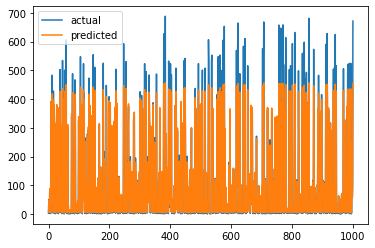

In [ ]:
import matplotlib.pyplot as plt
plt.plot(ytest,label = 'actual')
plt.plot(model.predict(xtest), label ='predicted')
plt.legend()
plt.show()

From this we see that it is able to predict somewhat correctly over the test data.

Now checking the prediction over the whole data, we get:

In [ ]:
df = pd.DataFrame(index = data.Date)
df['Actual'] = y
df['Predicted']=model.predict(x)

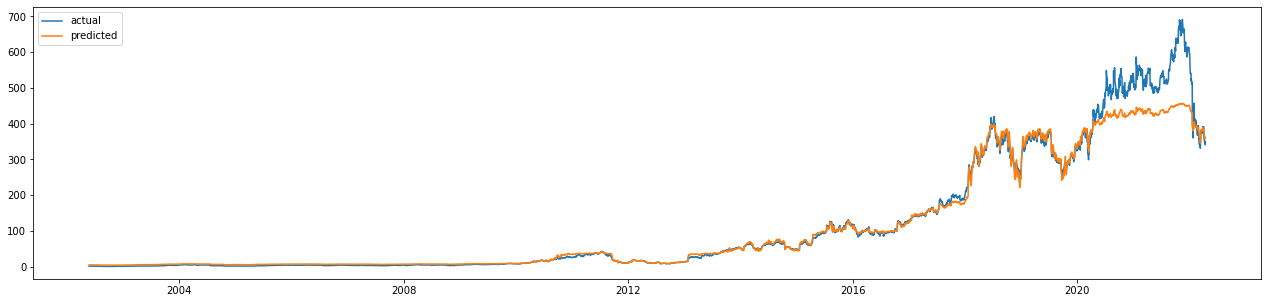

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22, 5))
plt.plot(df['Actual'],label = 'actual')
plt.plot(df['Predicted'], label ='predicted')
plt.legend()
plt.show()

From this we can see that our model is able to capture the pattern. Now predicting for a totally new data.

In [ ]:
import numpy as np
#features = [Open, High, Low, Adj Close, Volume]
features = np.array([[401.970001, 427.700012, 398.200012, 20047500]])
model.predict(features)

array([[397.35785]], dtype=float32)